In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

/home/gcasas/.local/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
# Elegir un dígito específico para mostrar el proceso PCA
digit_idx = 0
digit_image = X.iloc[digit_idx].to_numpy().reshape(28, 28)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

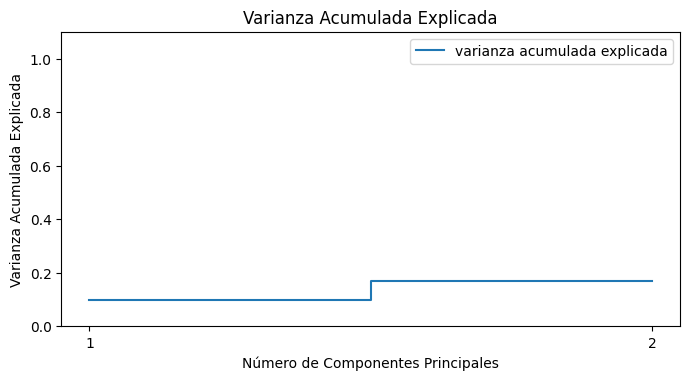

In [6]:
# Calcular la varianza acumulada de los componentes principales
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Visualizar los resultados de PCA
plt.figure(figsize=(7, 7))

# Varianza acumulada
plt.subplot(2, 1, 2)
# plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o')
plt.step(range(1, n_components + 1),explained_variance_ratio, where= 'mid', label='varianza acumulada explicada')
plt.title("Varianza Acumulada Explicada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.xticks(range(1, n_components + 1))
plt.ylim(0, 1.1)
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

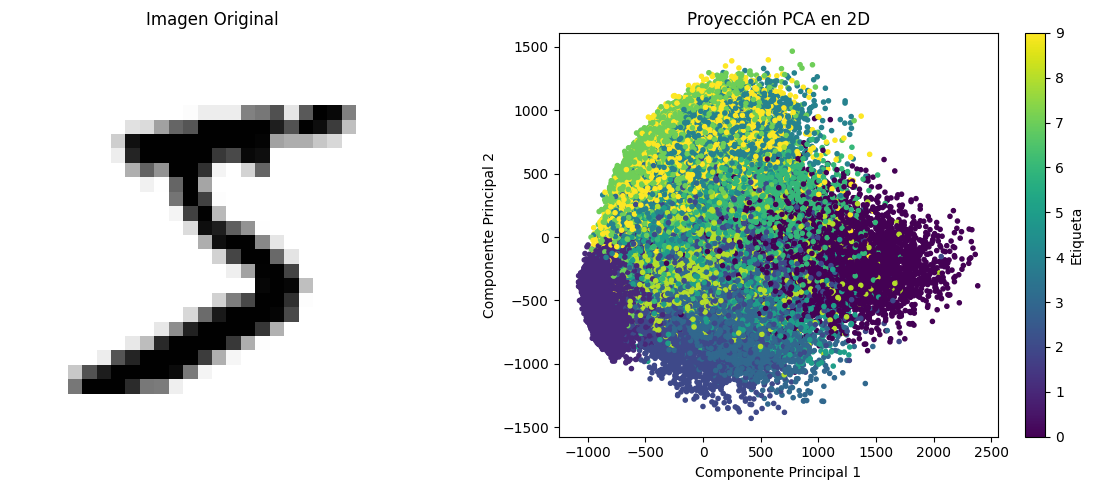

In [7]:
# Visualizar los resultados de PCA
plt.figure(figsize=(12, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(digit_image, cmap="binary")
plt.title("Imagen Original")
plt.axis("off")

# Componentes principales
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap="viridis", marker='.')
plt.colorbar(label="Etiqueta")
plt.title("Proyección PCA en 2D")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.tight_layout()
plt.show()